<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Linear_Regression_3%2Brecap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

  def predict(self, X):
    return np.dot(X, self.W)+self.b

  def update_weights(self):
    Y_pred = self.predict( self.X )

    # calculate gradients
    # Xt.MSE
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m

    # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

  def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape

    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]

    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

  def score(self, X, y): # calculate r2_score
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

### Implement above without using numpy just plain python

 LR Model= $X*W + b$

### Let's Try it on Cars24 dataset

In [29]:
# download data
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 146MB/s]


In [30]:
import pandas as pd

df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [33]:

df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [34]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [36]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [41]:
lr.predict(X_test)

array([0.20809636, 0.23979999, 0.48318907, ..., 0.38810658, 0.22165545,
       0.33236876])

In [42]:
lr.score(X_train, y_train)

0.44561126822255104

In [43]:
lr.score(X_test, y_test)

0.44097785630707864

In [44]:
lr.W

year                0.089005
km_driven           0.000604
mileage             0.006992
engine              0.039473
max_power           0.036144
age                 0.002390
make                0.080486
model               0.117323
Individual         -0.008482
Trustmark Dealer    0.000510
Diesel              0.089882
Electric            0.000293
LPG                -0.000733
Petrol              0.002659
Manual             -0.025143
5                   0.041845
>5                  0.044386
dtype: float64

In [45]:
lr.W

year                0.089005
km_driven           0.000604
mileage             0.006992
engine              0.039473
max_power           0.036144
age                 0.002390
make                0.080486
model               0.117323
Individual         -0.008482
Trustmark Dealer    0.000510
Diesel              0.089882
Electric            0.000293
LPG                -0.000733
Petrol              0.002659
Manual             -0.025143
5                   0.041845
>5                  0.044386
dtype: float64

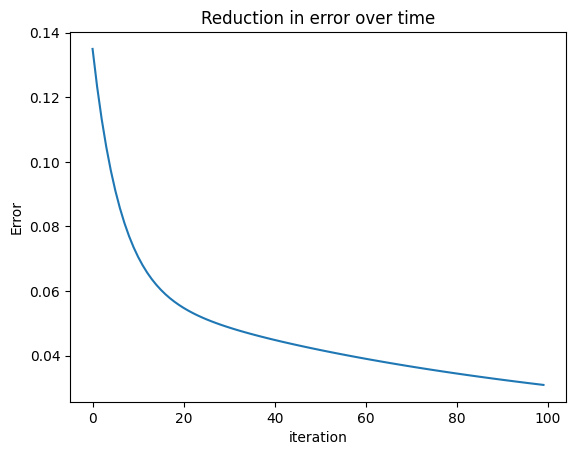

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

linear regression with Sklearn

In [49]:
from sklearn.linear_model import LinearRegression